In [114]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np

In [115]:
#F - number of letters in first name L - number of letters in last name N = (L+F)*100
F = 5
L = 6
N = (L+F)*100

In [116]:
data=dict(N=N)

In [117]:
data_generator_code1 = CmdStanModel(stan_file = 'code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [118]:
result_code1 = data_generator_code1.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 3 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 2 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)

chain 3 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)
chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)

chain 3 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 1 |███▏      | 00:00 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 4 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)

chain 3 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (S


INFO:cmdstanpy:CmdStan done processing.


In [119]:
data_generator_code2 = CmdStanModel(stan_file = 'code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [120]:
result_code2 = data_generator_code2.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 4 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 2 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 4 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)

chain 3 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)
chain 1 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 4 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)

chain 3 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 1 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 4 |██▎       | 00:02 Iteration: 300 / 1000 [ 30%]  (Sampling)

chain 1 |██▋       | 00:02 Iteration: 400 / 1000 [ 40%]  (Sampling)
chain 2 |██▎       | 00:02 


INFO:cmdstanpy:CmdStan done processing.


In [121]:
X_matrix = result_code2.stan_variable('X')[0]
print(len(X_matrix))

1100


In [122]:
x_code1=result_code1.draws_pd()
print(x_code1)

      lp__  accept_stat__  theta      y[1]      y[2]      y[3]      y[4]  \
0      0.0            0.0   0.01  0.928244  1.435020 -0.072055 -1.024970   
1      0.0            0.0   0.01 -0.146075  0.731404 -0.253398  1.912420   
2      0.0            0.0   0.01 -0.539253 -0.684611  0.928896 -0.549313   
3      0.0            0.0   0.01 -0.017911  0.921089  2.133110 -0.904384   
4      0.0            0.0   0.01 -1.288520  0.808454  0.286422 -0.709091   
...    ...            ...    ...       ...       ...       ...       ...   
3995   0.0            0.0   0.01  1.126120 -1.591840  0.255215  0.402576   
3996   0.0            0.0   0.01 -0.817862 -1.571360 -0.683985 -0.709174   
3997   0.0            0.0   0.01 -0.358940  1.182910 -0.016336 -3.712480   
3998   0.0            0.0   0.01 -0.281029 -1.483320 -0.632505  0.791640   
3999   0.0            0.0   0.01  1.008880 -1.255510  0.208576  1.218300   

          y[5]      y[6]      y[7]  ...   y[1091]    y[1092]   y[1093]  \
0    -0.66041

In [123]:
y_code1=x_code1.iloc[:,3:]
y_mean_code1=y_code1.mean()
print(y_mean_code1)

y[1]       0.083612
y[2]       0.129942
y[3]       0.116732
y[4]       0.101555
y[5]       0.153726
             ...   
y[1096]    0.124443
y[1097]    0.085845
y[1098]    0.026109
y[1099]    0.059973
y[1100]    0.091235
Length: 1100, dtype: float64


In [126]:
x_code2=result_code2.draws_pd()

In [127]:
y_code2=x_code2.iloc[:,-1100:]
print(x_code2.iloc[:,-1100:])

          y[1]      y[2]      y[3]      y[4]      y[5]      y[6]      y[7]  \
0     4.376500 -2.860990 -4.067130  0.380568 -0.813188  3.596770  3.639040   
1    -0.894995 -0.857765  1.469890  3.814870 -2.153120  0.258780  0.601617   
2    -5.014660  1.910540  1.874840 -0.701165  0.995959  1.677080 -4.956000   
3     1.247050  6.427220 -2.104770 -1.335880  1.270300 -0.978332  0.767279   
4     3.168450 -0.290821  0.959031  0.579346 -2.331820  3.756710  0.171396   
...        ...       ...       ...       ...       ...       ...       ...   
3995  2.664130  1.534090  4.798940  3.028860  4.166350  0.856175 -0.830947   
3996  0.002327 -2.889670  1.894130 -2.869410 -2.036640  0.183057  0.182062   
3997 -3.439940 -0.041626  2.996290  1.826850 -0.214748  1.469420 -1.550260   
3998 -0.453181 -3.041570 -3.395550 -4.903730  0.418632  0.652128 -1.107260   
3999 -3.551560 -4.891420 -2.366810 -0.297354 -0.409409  0.351775  1.750720   

          y[8]     y[9]     y[10]  ...   y[1091]   y[1092]   y[

In [128]:
y_mean_code2=y_code2.mean(axis=0)

In [129]:
print(y_mean_code2)

y[1]       0.025524
y[2]       0.052662
y[3]       0.083085
y[4]      -0.005775
y[5]       0.010612
             ...   
y[1096]   -0.013063
y[1097]    0.025348
y[1098]   -0.017105
y[1099]    0.007255
y[1100]    0.034052
Length: 1100, dtype: float64


Excercise 2 - compare normal and student models for data from first file

In [130]:
model_code3 = CmdStanModel(stan_file='code_3.stan')
data_model3_v1 = dict(N=N,
                 y=y_mean_code1)
result_model3_v1 = model_code3.sample(data=data_model3_v1)

data_model3_v2 = dict(N=N,
                 y=y_mean_code2)
result_model3_v2 = model_code3.sample(data=data_model3_v2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 3 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 4 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 3 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 4 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)A


chain 4 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 4 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 3 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 3 |████████▋ | 00


INFO:cmdstanpy:CmdStan done processing.


In [131]:
model_code4 = CmdStanModel(stan_file='code_4.stan')
data_model4_v1 = dict(N=N,
                 y=y_mean_code1)
result_model4_v1 = model_code4.sample(data=data_model4_v1)

data_model4_v2 = dict(N=N,
                 y=y_mean_code2)
result_model4_v2 = model_code4.sample(data=data_model4_v2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 3 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 2 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 4 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 2 |█▊      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |▍         | 00:00 Status

chain 3 |▍         | 00:00 Status


chain 4 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 2 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 3 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)





INFO:cmdstanpy:CmdStan done processing.


Compare model3

In [133]:
az.loo(result_model3_v1)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2383.14    24.89
p_loo        2.18        -

In [134]:
az.loo(result_model3_v2)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2018.15    23.24
p_loo        1.98        -

In [135]:
az.waic(result_model3_v1)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2383.14    24.89
p_waic        2.19        -

In [136]:
az.waic(result_model3_v2)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2018.15    23.24
p_waic        1.98        -

Compare model4

In [137]:
az.loo(result_model4_v1)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2383.85    24.72
p_loo        2.34        -

In [138]:
az.loo(result_model4_v2)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2016.94    23.37
p_loo        2.08        -

In [139]:
az.waic(result_model4_v1)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2383.85    24.72
p_waic        2.34        -

In [140]:
az.waic(result_model4_v2)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2016.94    23.37
p_waic        2.08        -

Compare

In [141]:
res_model3_v1=az.from_cmdstanpy(result_model3_v1)
res_model3_v2=az.from_cmdstanpy(result_model3_v2)

In [142]:
compare_model3=az.compare({"1":res_model3_v1,"2":res_model3_v2})
print(compare_model3)

   rank          loo     p_loo      d_loo    weight         se        dse  \
1     0  2383.143306  2.184691    0.00000  0.892332  24.889649   0.000000   
2     1  2018.153866  1.975255  364.98944  0.107668  23.242456  34.364727   

   warning loo_scale  
1    False       log  
2    False       log  


<AxesSubplot:xlabel='Log'>

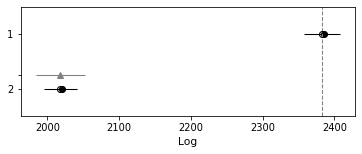

In [143]:
az.plot_compare(compare_model3)

In [144]:
res_model4_v1=az.from_cmdstanpy(result_model4_v1)
res_model4_v2=az.from_cmdstanpy(result_model4_v2)

In [145]:
compare_model4=az.compare({"1":res_model4_v1,"2":res_model4_v2})
print(compare_model4)

   rank          loo     p_loo       d_loo    weight         se        dse  \
1     0  2383.847863  2.342921    0.000000  0.884048  24.718823   0.000000   
2     1  2016.937051  2.082437  366.910812  0.115952  23.372911  34.327286   

   warning loo_scale  
1    False       log  
2    False       log  


<AxesSubplot:xlabel='Log'>

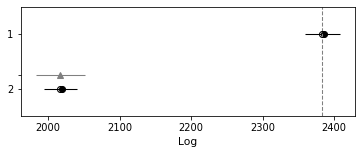

In [146]:
az.plot_compare(compare_model4)

Excercise 3 - compare models with different numbers of predictors

In [147]:
model5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


Predictor K=1

In [148]:
nxm=[]
for i in X_matrix[:,0]:
    nxm.append([i])

data5_K1=dict(N=N,K=1,y=np.array(y_mean_code2),X=nxm)
result_K1= model5.sample(data=data5_K1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 2 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 4 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 4 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 4 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 4 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


INFO:cmdstanpy:CmdStan done processing.


Predictor K=2

In [149]:
nxm=[]
matrix_tmp = X_matrix[:,0:2]
for i in matrix_tmp:
    vect = []
    for j in i:
        vect.append(j)
    nxm.append(vect)

data5_K2=dict(N=N,K=2,y=np.array(y_mean_code2),X=nxm)
result_K2= model5.sample(data=data5_K2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 3 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 4 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 4 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 2 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


c


INFO:cmdstanpy:CmdStan done processing.


Predictor K = 3

In [150]:
nxm=[]
matrix_tmp = X_matrix[:,0:3]
for i in matrix_tmp:
    vect = []
    for j in i:
        vect.append(j)
    nxm.append(vect)

print(len(matrix_tmp[0]))

data5_K3=dict(N=N,K=3,y=np.array(y_mean_code2),X=nxm)
result_K3= model5.sample(data=data5_K3)

INFO:cmdstanpy:CmdStan start processing


3


chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |▍         | 00:00 Status

chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 4 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 4 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 4 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 3 


INFO:cmdstanpy:CmdStan done processing.


In [151]:
az.loo(result_K1)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2018.48    23.17
p_loo        1.98        -

In [152]:
az.loo(result_K2)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2017.87    23.20
p_loo        3.08        -

In [153]:
az.loo(result_K3)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2017.37    23.22
p_loo        4.10        -

In [154]:
az.waic(result_K1)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2018.48    23.17
p_waic        1.98        -

In [155]:
az.waic(result_K2)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2017.87    23.20
p_waic        3.08        -

In [156]:
az.waic(result_K3)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2017.37    23.22
p_waic        4.10        -

In [157]:
compare_model5_K1=az.from_cmdstanpy(result_K1)
compare_model5_K2=az.from_cmdstanpy(result_K2)
compare_model5_K3=az.from_cmdstanpy(result_K3)

compare_result_model5=az.compare({"1":compare_model5_K1,"2":compare_model5_K2, "3":compare_model5_K3})
compare_result_model5

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,2018.476676,1.984611,0.000000,1.0,23.168052,0.000000,False,log
2,1,2017.872362,3.076926,0.604315,0.0,23.202642,0.989886,False,log
3,2,2017.366771,4.101370,1.109905,0.0,23.217651,1.403685,False,log


<AxesSubplot:xlabel='Log'>

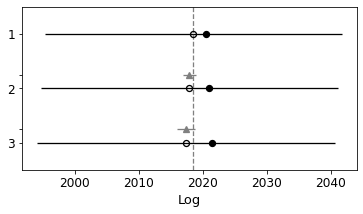

In [158]:
az.plot_compare(compare_result_model5)